# Datatask assignment:

Purchase orders given to us by organizations are often dirty. Right now we have very manual ways of cleaning up this data and matching it to products within our database. This small project is one potential solution to this problem.

Project - Python text similarity clustering

Research metrics for determining similarities between two strings.
Research methods of clustering that would work well with text-based data.
Write a script that parses through the data file and clusters the text into distinct groups.
The clusters should ideally be of different products with some margin of error, for example consider fuzzy clustering or LDA.
Visualize your results

Please work in an ipython notebook using Python 3.

# My research
Link: https://docs.google.com/document/d/1DpblLpTK_cfytejuwRMQvFvb35WyW3CcAktD0-N5als/edit?usp=sharing


# nltk, sklearn

I found the following simple recipe at:
https://nlpforhackers.io/recipe-text-clustering/

This simple algorithm uses the nltk and sklearn library and executes the following steps:

1) Remove punctuation

2) Tokenize

3) Stem using Porter stemmer

4) Vectorize the text using tf-idf, and filtering stopwords

5) Use k-mean to cluster these vectorized texts.

In [8]:
import string
import collections
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

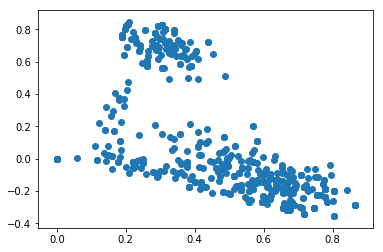

===== Cluster 1=====
Black Twin Tip Sharpie 12/pk

Fine Sharpie, Black

MARKERS SHARPIE X-TRA FIN PK12  [ SANFORD CORP / 35001 ] Sharpie Permanent Marker Black Extra Fine Tip

Marker, Sharpie - Fine Point Permanent Markers, Color Black, Tip Fine [ OfficeMax N230001 ] IN STOCK

Marker, Sharpie - Fine Point Permanent Markers, Color Black, Tip Fine [ OfficeMax N230001 ] IN STOCK

Marker, Sharpie - Fine Point Permanent Markers, Color Black, Tip Fine [ OfficeMax N230001 ] NEXT DAY

Marker, Sharpie - Fine Point Permanent Markers, Color Black, Tip Fine [OfficeMax N230001] IN STOCK

Marker, Sharpie, Extra Fine, Black [ OfficeMax N235001 ] IN STOCK

Marker, Sharpie, Extra Fine, Black [ OfficeMax N235001 ] IN STOCK

Marker, Sharpie, Extra Fine, Black [ OfficeMax N235001 ] NEXT DAY

Marker, Sharpie, Extra Fine, Black [OfficeMax N235001] IN STOCK

Marker, Sharpie, Ultra Fine, Black [ OfficeMax N237001 ] IN STOCK

Marker, Sharpie, Ultra Fine, Black [ OfficeMax N237001 ] IN STOCK

Marker, Sharpie, U

In [13]:
def process_text(text, stem=True):
    """ Remove punctuation, tokenize, and stem. """
    
#     print("===process_text - text:")
#     print(text)
    
    text = text.translate(str.maketrans('','',string.punctuation))
    tokens = word_tokenize(text)
 
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]

#     print("===process_text - tokens:")
#     print(tokens)
    return tokens
 
def cluster_texts(texts, clusters=3):
    """ Transform texts to Tf-Idf coordinates and cluster texts using K-Means """
    vectorizer = TfidfVectorizer(tokenizer=process_text,
                                 stop_words=stopwords.words('english'),
                                 max_df=0.5,
                                 min_df=0.1,
                                 lowercase=True)
 
    tfidf_model = vectorizer.fit_transform(texts)
    #print(tfidf_model)
    
    # Using PCA to visualize the data
    svd = TruncatedSVD(n_components=2, random_state=42)
    data_pca = svd.fit_transform(tfidf_model) 
    scatter_points(data_pca)
    
    km_model = KMeans(n_clusters=clusters)
    km_model.fit(tfidf_model)
 
    clustering = collections.defaultdict(list)
 
    for idx, label in enumerate(km_model.labels_):
        clustering[label].append(idx)
 
    return clustering

def scatter_points(data):
    plt.scatter(data[:,0], data[:,1])
    plt.show()

if __name__ == "__main__":
    with open('data.txt', 'r') as f:
        orders = f.readlines()
#     print("===main - orders:")
#     print(orders)

    clusters = cluster_texts(orders, 5) # five clusters
    
    #pprint(dict(clusters))
    clusters_d = dict(clusters)
    for key in clusters_d.keys():
        print("===== Cluster %d=====" % key)
        for i in clusters_d[key]:
            print(orders[i])

In [5]:
svd = TruncatedSVD(n_components=2, random_state=42)
data_pca = svd.fit_transform(tfidf_model) 

NameError: name 'tfidf_model' is not defined

In [28]:
# From the printout above, Cluster 4 seems to contain mostly "Black" color items, but other clusters just have
# colors all over the place. This unsupervised algorithm seems hard to control/tweak.

# TO-DO: 
# Plot the vectorized texts transformed via tf-idf and denote the cluster using colors.
# Probably matplotlib or some sort of plotting libraries/tools

# TO-DO:
# Try other methods for feature extraction, texts vectorization, and clustering

# gensim
Following tutorial:
https://radimrehurek.com/gensim/tutorial.html

In [1]:
# enable logging on the terminal during training, etc
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
import gensim
# need to install this on my machine

ModuleNotFoundError: No module named 'gensim'